PNG
(696, 464)
[[[44 33 29]
  [28 19 19]
  [18 13 14]
  ...
  [ 9  2  2]
  [10  2  3]
  [11  2  3]]

 [[30 21 18]
  [21 13 14]
  [16 10 12]
  ...
  [ 8  2  1]
  [10  2  2]
  [11  2  3]]

 [[18 15 14]
  [13 10 11]
  [11  9 10]
  ...
  [ 8  3  0]
  [ 8  2  2]
  [ 8  2  2]]

 ...

 [[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 4  3  4]
  [ 3  3  3]
  [ 4  4  4]
  ...
  [ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]]]


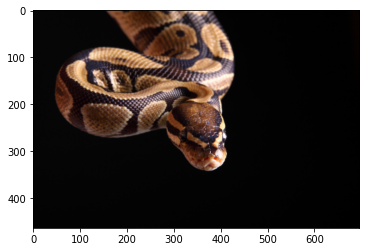

In [22]:
from PIL import Image
import numpy
from matplotlib import pyplot

#Importing Image with PIL
image = Image.open("python_image.png")
#Some Info
print(image.format)
print(image.size)
#Converting to NP Array
imgData = numpy.asarray(image).copy()
imgData.setflags(True, True)
#PyPlot
pyplot.imshow(imgData, cmap="binary")
print(imgData)


[[[130 162 227]
  [ 84 103 237]
  [ 60  76 242]
  ...
  [ 15  11 254]
  [ 18  14 253]
  [ 19  14 253]]

 [[ 84 102 238]
  [ 63  76 242]
  [ 52  64 244]
  ...
  [ 10   5 255]
  [ 16  11 254]
  [ 19  14 253]]

 [[ 60  78 242]
  [ 45  58 245]
  [ 41  54 246]
  ...
  [  8   3   0]
  [ 14  11 254]
  [ 14  11 254]]

 ...

 [[ 11  15 253]
  [ 11  15 253]
  [ 11  15 253]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 11  15 253]
  [ 11  15 253]
  [ 11  15 253]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 16  21 252]
  [ 11  15 253]
  [ 16  22 252]
  ...
  [  3   4 255]
  [  0   0   0]
  [  0   0   0]]]


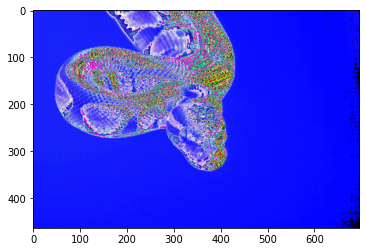

In [29]:

shear = numpy.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
for arr1 in imgData:
    for index, data in enumerate(arr1):
        arr1[index] = shear.dot(data)
        

print(imgData)
pyplot.imshow(imgData, cmap=pyplot.cm.gray)

In [ ]:
data = numpy.array([
    [3.0, 4.0, 1.0, 4.6],
    [0.2, 3.5, 2.0, 0.5]
])
x_coords_data, y_coords_data = data
pyplot.scatter(x_coords_data, y_coords_data)
pyplot.axis([0, 5, 0, 4])
pyplot.show()

In [ ]:
from matplotlib.patches import Polygon
pyplot.gca().add_artist(Polygon(data.T))
pyplot.axis([0, 5, 0, 4])
pyplot.grid()
pyplot.show()